In [2]:
# Initialization code that runs before all other cells
from preprocessing import preprocess, get_labels
from extraction import feature_extraction
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise as pw
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity
from sklearn.pipeline import make_pipeline
import marimo as mo
import seaborn as sns
import matplotlib.pyplot as plt

# Explore the Impacts of Different Kernels
Kernels are an affinity function, and there are many available in the [scikit-learn]("https://scikit-learn.org/stable/modules/metrics.html") package.  Below I will explore how they apply to the [plant health]("data/plant_health_dataset.csv") dataset

In [3]:
df = pd.read_csv("../../../data/plant_health_data.csv")
df

,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
0,2024-10-03 10:54:53.407995,1,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress
1,2024-10-03 16:54:53.407995,1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress
2,2024-10-03 22:54:53.407995,1,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,High Stress
3,2024-10-04 04:54:53.407995,1,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,High Stress
4,2024-10-04 10:54:53.407995,1,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,High Stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2024-11-01 04:54:53.493508,10,29.665780,27.605285,15.381699,54.668196,650.536854,5.715289,29.993107,14.914470,21.560747,24.273224,0.714553,Moderate Stress
1196,2024-11-01 10:54:53.493508,10,15.490782,22.108112,15.221033,61.243143,768.760787,5.958957,45.258678,25.216248,31.940717,30.930676,1.448029,High Stress
1197,2024-11-01 16:54:53.493508,10,23.495723,21.680240,15.499764,40.693671,293.643366,7.419157,38.351189,48.656078,28.473233,38.324484,0.880019,Moderate Stress
1198,2024-11-01 22:54:53.493508,10,30.971675,23.019488,21.934918,41.387107,492.952014,5.855767,49.402550,23.843971,19.750042,46.027529,0.344597,Healthy


In [4]:
y = get_labels(df)
y

,Plant_Health_Status
Timestamp,
2024-10-03 10:54:53.407995,High Stress
2024-10-03 16:54:53.407995,High Stress
2024-10-03 22:54:53.407995,High Stress
2024-10-04 04:54:53.407995,High Stress
2024-10-04 10:54:53.407995,High Stress
...,...
2024-11-01 04:54:53.493508,Moderate Stress
2024-11-01 10:54:53.493508,High Stress
2024-11-01 16:54:53.493508,Moderate Stress


In [15]:
processed = preprocess(df,attr=[])
X = processed
X

,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal
Timestamp,,,,,,,,,,,
2024-10-03 10:54:53.407995,0.278321,-0.511285,0.662825,0.049963,-0.247408,-1.620166,-1.746638,1.355983,0.768579,0.108796,-0.080646
2024-10-03 16:54:53.407995,-1.184139,-0.666361,-0.435676,1.035845,-0.072300,1.051744,0.052635,-0.424888,-1.043216,-0.770972,-1.431377
2024-10-03 22:54:53.407995,-0.924655,-0.819209,-1.557519,1.478694,-0.094261,-1.491368,-0.066879,-0.234739,0.479665,1.015220,0.163452
2024-10-04 04:54:53.407995,-1.126428,-0.408656,0.962382,0.380088,-1.626583,-1.615750,-1.141667,-0.356286,-0.330470,0.352435,0.344986
2024-10-04 10:54:53.407995,1.696462,1.433049,-0.633556,1.015672,-0.736748,-1.039349,-1.664853,0.666060,0.646682,1.542359,1.082045
...,...,...,...,...,...,...,...,...,...,...,...
2024-11-01 04:54:53.493508,0.525571,1.048262,-1.561354,-0.021064,0.166063,-1.390877,-0.009874,-1.339201,-0.733189,-1.195476,-0.475251
2024-11-01 10:54:53.493508,-1.108602,-0.549694,-1.616173,0.727684,0.684081,-0.971854,1.316460,-0.440430,0.156786,-0.435783,0.800634
2024-11-01 16:54:53.493508,-0.185748,-0.674071,-1.521070,-1.612468,-1.397725,1.539182,0.716310,1.604562,-0.140515,0.407937,-0.187423


In [28]:
options = mo.ui.dropdown(label="kernel",options=['gaussian', 'tophat', 'epanechnikov', 'exponential','linear', 'cosine'
],value='tophat')
bandwidth = mo.ui.slider(0.6,1,0.1,label="Bandwidth")

In [29]:
mo.md(f"""
# Density Estimation for Outlier Detection
{options}
{bandwidth}
""")

_md()

In [30]:
kde = make_pipeline(
    PCA(n_components=10),
    KernelDensity(kernel=options.value,bandwidth=bandwidth.value)
)
kde.fit(X)

,steps,"[('pca', ...), ('kerneldensity', ...)]"
,transform_input,None
,memory,None
,verbose,False
,n_components,10
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10


Text(0.5, 0, 'KDE')

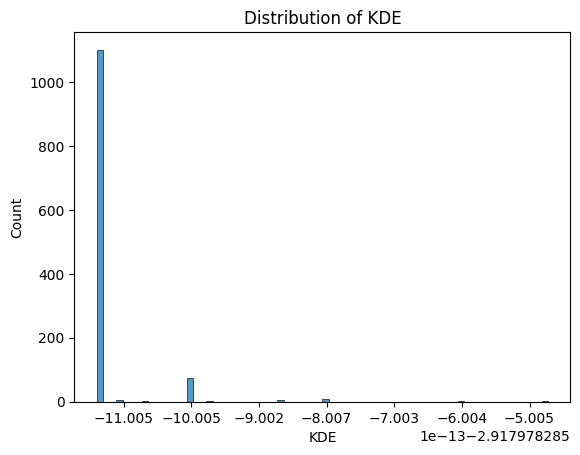

In [31]:
scores = kde.score_samples(X)

sns.histplot(scores)
plt.title("Distribution of KDE")
plt.xlabel("KDE")

Text(0.5, 0, 'KDE')

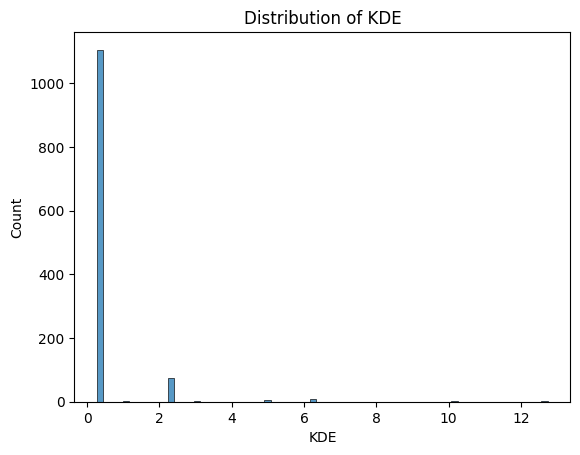

In [32]:
z = abs((scores - scores.mean()) / scores.std())
sns.histplot(abs(z))
plt.title("Distribution of KDE")
plt.xlabel("KDE")

In [33]:
scores_df = pd.DataFrame(data=np.column_stack([scores,z]),columns=['Score','Standardized'])
scores_df

,Score,Standardized
0,-2.917978,0.269027
1,-2.917978,0.269027
2,-2.917978,0.269027
3,-2.917978,0.269027
4,-2.917978,0.269027
...,...,...
1195,-2.917978,0.269027
1196,-2.917978,0.269027
1197,-2.917978,0.269027
1198,-2.917978,0.269027


In [34]:
mo.md(f"Number of outliers: {(scores_df['Standardized'] > 3).sum()}")

_md()

In [35]:
def kde_outliers(X, n_comps:int = 5, kernel = 'gaussian', bandwidth:float = 0.8, t:float = 3):
    """
        Calculate Outliers using KDE
        First dimensionality is reduced using PCA
        then kernel density estimation is performed
        finally ouput is standardized to make a binary mask
        returns (mask, standardized scores, raw scores)
    """
    estimator = make_pipeline(PCA(n_components=n_comps),KernelDensity(kernel=kernel,bandwidth=bandwidth))
    estimator.fit(X)
    scores = estimator.score_samples(X)
    z = abs((scores - scores.mean()) / scores.std())
    return z > t, z, scores

In [36]:
outliers, s, k = kde_outliers(X,n_comps=10)
outliers.sum()

np.int64(7)